Link dataset :https://www.kaggle.com/datasets/yasserh/student-marks-dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [64]:
df = pd.read_csv('Student_Marks.csv')

In [65]:
print("Tota Rows and Columns (Rows,Columns) : ",df.shape)
df.head(10)

Tota Rows and Columns (Rows,Columns) :  (100, 3)


,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
5,6,3.211,17.822
6,3,6.063,29.889
7,5,3.413,17.264
8,4,4.410,20.348
9,3,6.173,30.862


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [67]:
#check for missing values
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [68]:
#check for duplicate values
print("jumlah duplikasi data :", df.duplicated().sum())


jumlah duplikasi data : 0


In [69]:
#summary statistics data
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [80]:
# Select relevant features (X) and target variable (y)
X = df[[ 'time_study']]
y = df['Marks']

In [81]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

# train and test datasets are sorted for plotting purpose 
train = train.sort_values('time_study')
test = test.sort_values('time_study')

X_train, X_test = train[['time_study']], test[['time_study']]
y_train, y_test = train['Marks'], test['Marks']

In [84]:
# Feature scaling
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')

svr_lin.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)

SVR(kernel='poly')

Text(0, 0.5, 'Marks')

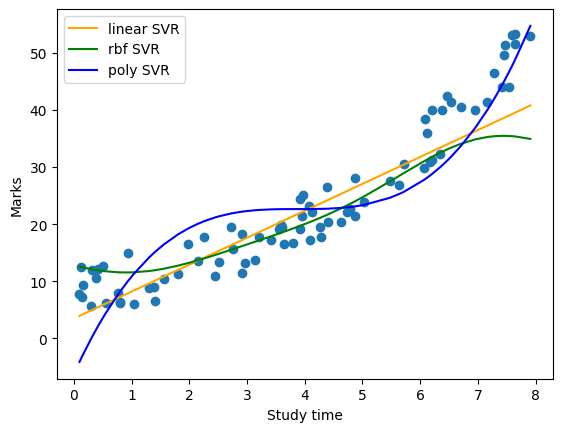

In [86]:
#### Model prediction for train dataset ####
train['linear_svr_pred'] = svr_lin.predict(X_train_scaled)
train['rbf_svr_pred'] = svr_rbf.predict(X_train_scaled)
train['poly_svr_pred'] = svr_poly.predict(X_train_scaled)

#### Visualization ####
plt.scatter(train['time_study'], train['Marks'])
plt.plot(train['time_study'], train['linear_svr_pred'], color = 'orange', label = 'linear SVR')
plt.plot(train['time_study'], train['rbf_svr_pred'], color = 'green', label = 'rbf SVR')
plt.plot(train['time_study'], train['poly_svr_pred'], color = 'blue', label = 'poly SVR')
plt.legend()
plt.xlabel('Study time')
plt.ylabel('Marks')

In [87]:
import numpy as np
from sklearn import metrics

#### Test dataset - metrics ####
y_test_pred = svr_lin.predict(X_test_scaled)
r2_score = round(metrics.r2_score(y_test, y_test_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2)
print(f'r2: {r2_score}')
print(f'rmse: {rmse}')

r2: 0.83
rmse: 6.7


Text(0, 0.5, 'Actual')

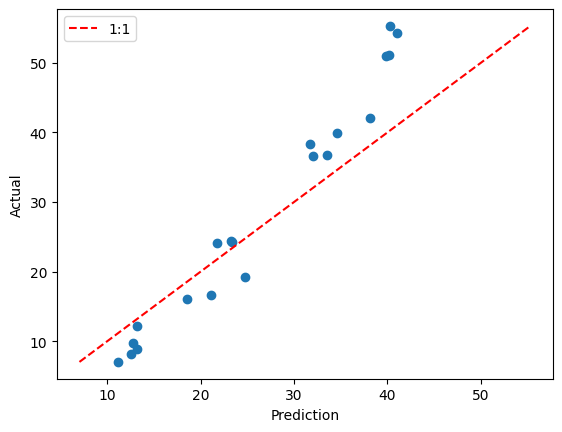

In [90]:
#### Test dataset - plot ####
y_test_pred = svr_lin.predict(X_test_scaled)
min_axis = min(min(y_test_pred), min(y_test))
max_x = max(max(y_test_pred), max(y_test))
plt.scatter(y_test_pred, y_test)
plt.plot([min_axis,max_x], [min_axis,max_x], 'r--', label = '1:1')
plt.legend()
plt.xlabel('Prediction')
plt.ylabel('Actual')

## kesimpulan

model SVM untuk dataset ini sudah cukup baik untuk mempredisi. Dimana Nilai R2 sebesar 0,83 menunjukkan bahwa sekitar 83% dari varians dalam nilai siswa dapat dijelaskan oleh waktu belajar rata-rata. Nilai RMSE sebesar 6,7 menunjukkan besarnya rata-rata residual (kesalahan prediksi) antara nilai aktual dan nilai yang diprediksi.